### Plotting

In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-1]
curr_path = "/".join(curr_path)
os.chdir(curr_path)
os.getcwd()

'/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library'

In [2]:
from sclibrary import read_csv, get_coordinates
from sclibrary import SimplicialComplexNetwork

data_folder = 'data/sample_data'

# read csv
filename = data_folder + '/edges.csv'
delimeter = " "
src_col = 'Source'
dest_col = 'Target'
feature_cols = ['Distance']

G = read_csv(filename=filename, delimeter=delimeter, src_col=src_col, dest_col=dest_col, feature_cols=feature_cols)
simplices = G.simplicies(condition="distance", dist_col_name="Distance", dist_threshold=1.5)

# if coordinates exist
filename = data_folder + '/coordinates.csv'
coordinates = get_coordinates(filename=filename, 
                                            node_id_col="Id", 
                                            x_col='X', 
                                            y_col='Y', 
                                            delimeter=" ")

# create sc
sc = SimplicialComplexNetwork(simplices=simplices)

### Draw network without edge flow

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:154: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


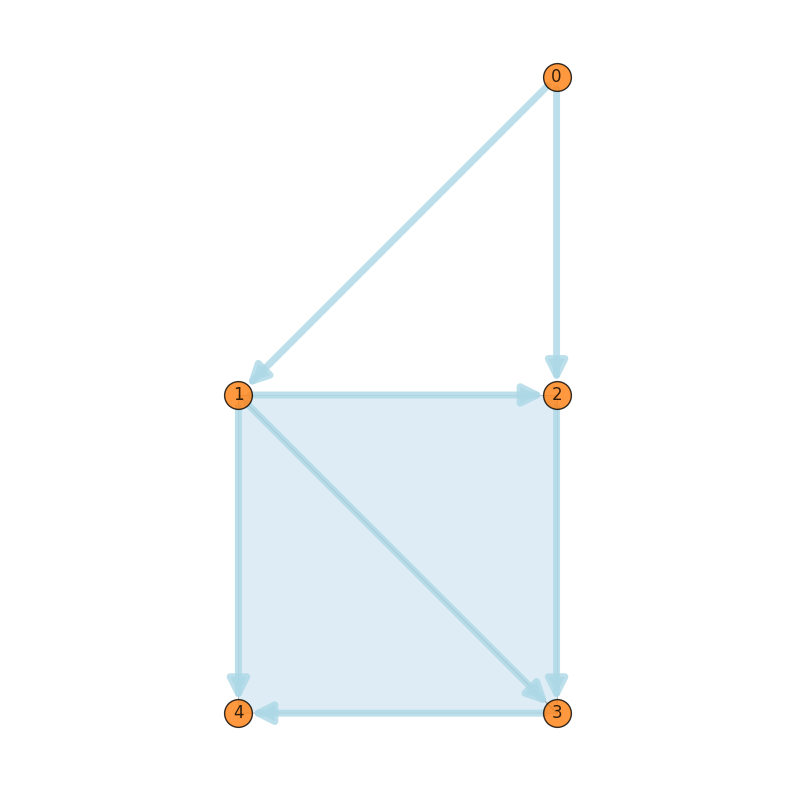

In [3]:
from sclibrary import SCPlot
from matplotlib import pyplot as plt


sample_edge_flow = [0.0, 0.2, 0.3, 0.0, 0.5, 1, 3]
sample_node_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# create plot
fig, _ = plt.subplots(figsize=(10, 10))
scplot = SCPlot(sc=sc, pos=coordinates)


scplot.draw_network()

### Draw network with custom parameters

/var/folders/py/wfd5gjj55nx4cqtdvltb22mw0000gp/T/ipykernel_99795/3934483121.py:4: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  scplot.draw_sc_nodes(node_size=300, node_color=sample_node_values, with_labels=True)
/var/folders/py/wfd5gjj55nx4cqtdvltb22mw0000gp/T/ipykernel_99795/3934483121.py:6: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  scplot.draw_sc_edges(edge_width=10,


Text(0.5, 1.0, 'u_h, λ = 0')

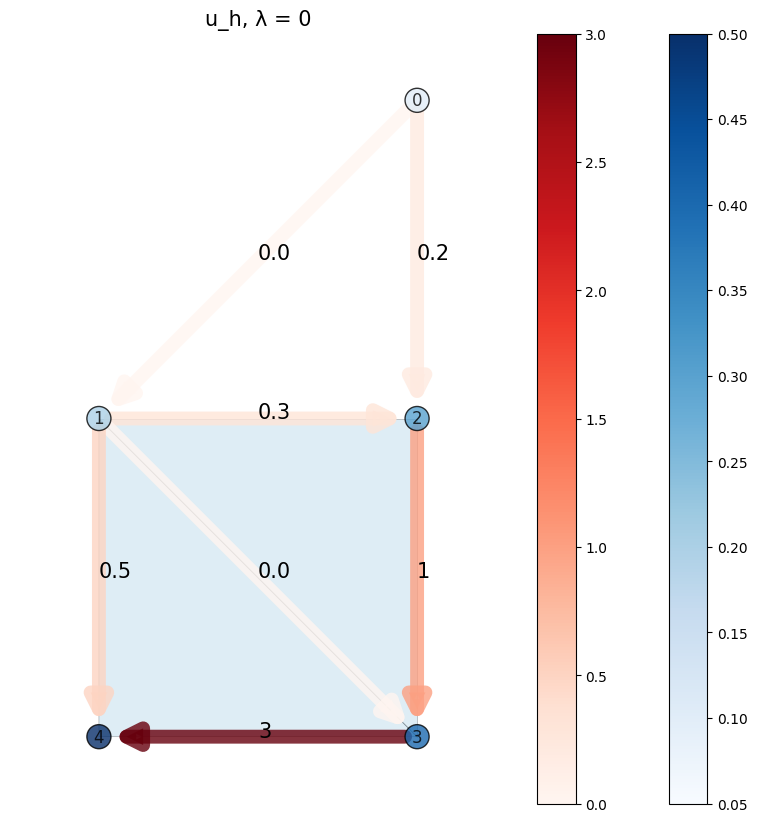

In [4]:
fig, _ = plt.subplots(figsize=(10, 10))

# plot nodes and edges
scplot.draw_sc_nodes(node_size=300, node_color=sample_node_values, with_labels=True)

scplot.draw_sc_edges(edge_width=10,
                     arrowsize=30, 
                     edge_color=sample_edge_flow,
                    )

scplot.draw_edge_labels(flow=sample_edge_flow, font_size=15)

plt.title("u_h, λ = " + str(0), fontsize=15)